In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
  inflating: __MACOSX/._dataset      
   creating: dataset/Valid/
  inflating: __MACOSX/dataset/._Valid  
  inflating: dataset/.DS_Store       
  inflating: __MACOSX/dataset/._.DS_Store  
   creating: dataset/Test/
  inflating: __MACOSX/dataset/._Test  
  inflating: dataset/Monkeypox_Dataset_metadata.csv  
   creating: dataset/Train/
  inflating: __MACOSX/dataset/._Train  
   creating: dataset/MSLD v1/
  inflating: dataset/Valid/.DS_Store  
  inflating: __MACOSX/dataset/Valid/._.DS_Store  
   creating: dataset/Valid/Others/
   creating: dataset/Valid/Monkeypox/
  inflating: __MACOSX/dataset/Valid/._Monkeypox  
  inflating: dataset/Test/.DS_Store  
  inflating: __MACOSX/dataset/Test/._.DS_Store  
   creating: dataset/Test/Others/
  inflating: __MACOSX/dataset/Test/._Others  
   creating: dataset/Test/Monkeypox/
  inflating: __MACOSX/dataset/Test/._Monkeypox  
  inflating: dataset/Train/.DS_Store  
  inflating: __MACOSX/dataset/Train/._.DS_Stor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [ ]:
dataset_path = './dataset/'

In [ ]:
info_data = pd.read_csv(dataset_path + 'Monkeypox_Dataset_metadata.csv')

In [ ]:
info_data.head()

,ImageID,Label
0,M01_01,Monkeypox
1,M01_02,Monkeypox
2,M01_03,Monkeypox
3,M01_04,Monkeypox
4,M02_01,Monkeypox


In [ ]:
info_data['Label'].nunique()

2

In [ ]:
info_data.shape

(228, 2)

In [ ]:
def ImageAddress(x):
    if(x[0] == 'M'):
        return dataset_path + 'MSLD v1/Monkey Pox/' + x + '.jpg'
    else:
        return dataset_path + 'MSLD v1/Others/' + x + '.jpg'


In [ ]:
info_data['path'] = info_data['ImageID'].apply(ImageAddress)

In [ ]:
info_data.head()

,ImageID,Label,path
0,M01_01,Monkeypox,./dataset/MSLD v1/Monkey Pox/M01_01.jpg
1,M01_02,Monkeypox,./dataset/MSLD v1/Monkey Pox/M01_02.jpg
2,M01_03,Monkeypox,./dataset/MSLD v1/Monkey Pox/M01_03.jpg
3,M01_04,Monkeypox,./dataset/MSLD v1/Monkey Pox/M01_04.jpg
4,M02_01,Monkeypox,./dataset/MSLD v1/Monkey Pox/M02_01.jpg


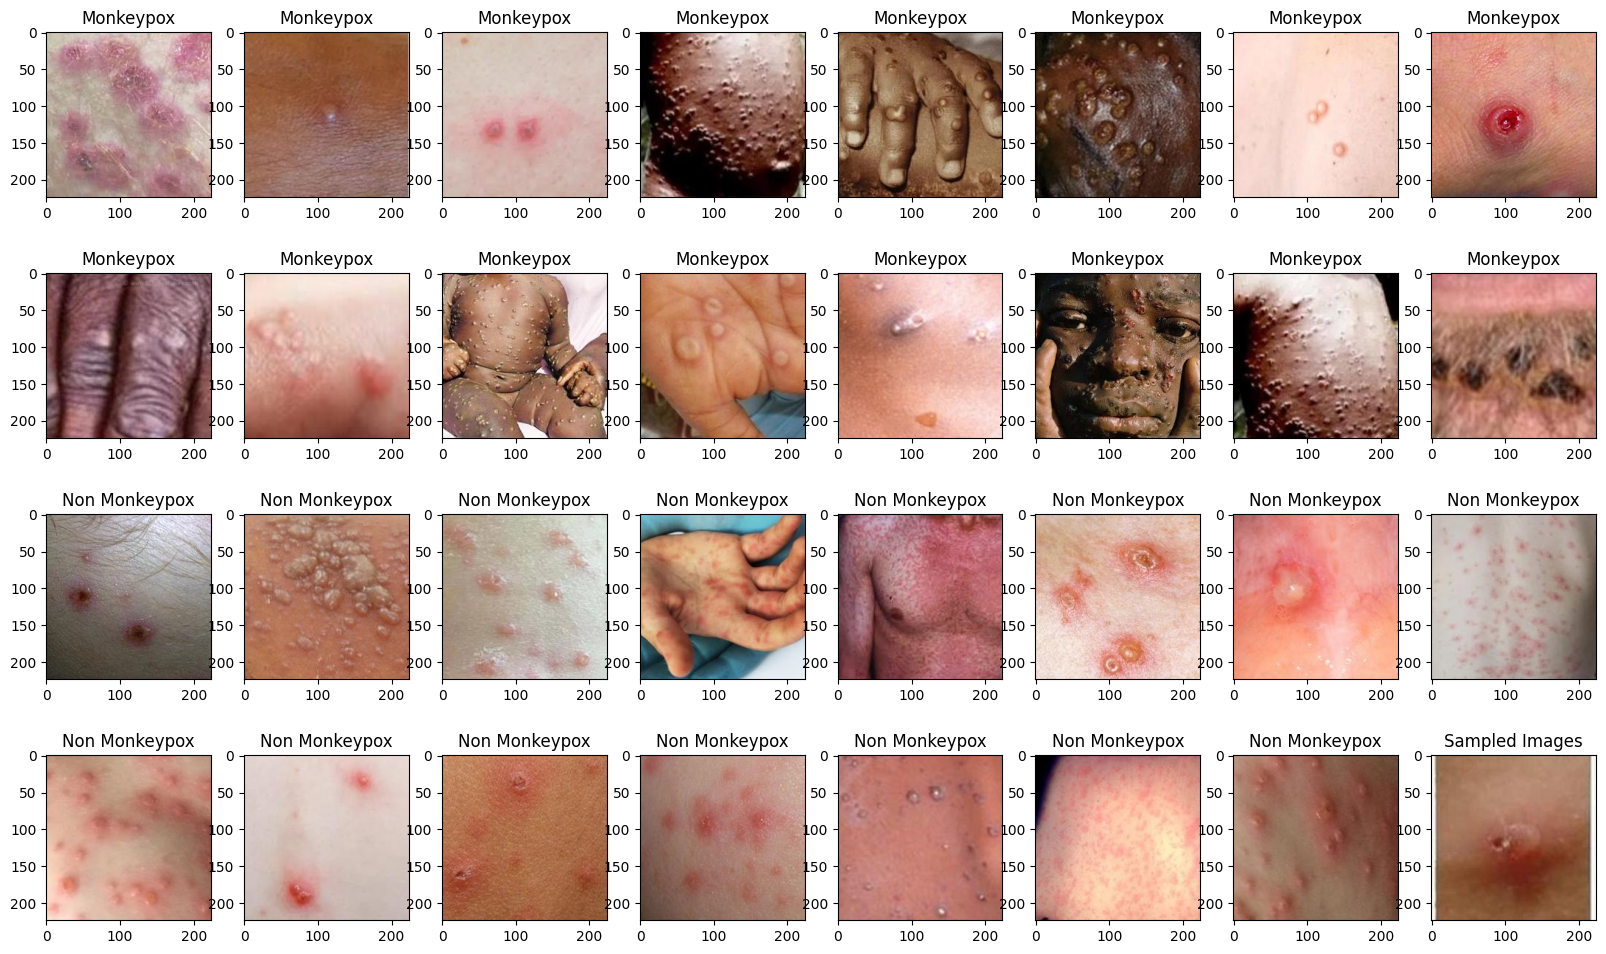

In [ ]:
fig, ax = plt.subplots(4, 8, figsize=(20, 12))

monkeypox_data = info_data[info_data['Label'] == 'Monkeypox']
non_monkeypox_data = info_data[info_data['Label'] != 'Monkeypox']

monkeypox_sample = monkeypox_data.sample(n=16, ignore_index = True)
non_monkeypox_sample = non_monkeypox_data.sample(n=16, ignore_index = True)

# Concatenate the two samples into a single DataFrame for display
random_data = pd.concat([monkeypox_sample, non_monkeypox_sample], ignore_index = True)



k = 0
for i in range(4):
    for j in range(8):
            ax[i][j].set_title(random_data['Label'][k])
            ax[i][j].imshow(plt.imread(random_data['path'][k]))
            k+=1

plt.title("Sampled Images")
plt.show()



### Data Augemnetation and Splitting

In [ ]:
# !pip install split-folders

# import splitfolders # or import splitfolders
# input_folder = dataset_path + "Original Images"
# output = dataset_path + "Split" #where you want the split datasets saved. one will be created if it does not exist or none is set

# splitfolders.ratio(input_folder, output=output, seed=45, ratio=(.8, .1, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

In [ ]:
# from keras.preprocessing import image_dataset_from_directory



# training_df = image_dataset_from_directory(
#     dataset_path + "Original Images",
#     batch_size = 10,
#     image_size = (300,300),

#     shuffle = True,
#     seed = 45,
#     validation_split = 0.15,
#     subset = 'training'
# )

# testing_df = image_dataset_from_directory(
#     dataset_path + "Original Images",
#     batch_size = 10,
#     image_size = (300,300),

#     shuffle = True,
#     seed = 45,
#     validation_split = 0.1,
#     subset = 'validation'
# )

In [ ]:
# # Set up parameters for data augmentation
# train_datagen = ImageDataGenerator(
#     rescale=1. /255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )


# val_datagen = ImageDataGenerator(
#     rescale=1. /255
# )

# train_generator = train_datagen.flow_from_directory(
#     dataset_path + "Split/train",
#     seed = 42,
#     target_size=(300, 300),
#     shuffle = True,
#     batch_size=10,
#     class_mode='categorical'
# )

# validation_generator = val_datagen.flow_from_directory(
#     dataset_path + "Split/val",
#     target_size=(300, 300),
#     seed = 42,
#     shuffle = True,
#     batch_size=10,
#     class_mode='categorical'
# )

# test_generator = val_datagen.flow_from_directory(
#     dataset_path + "Split/test",
#     target_size=(300, 300),
#     seed = 42,
#     shuffle = True,
#     class_mode='categorical'
# )

In [ ]:
gen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
    rescale=1. /255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
)


# Loading Data
train_data = train_datagen.flow_from_directory(
    dataset_path + "Train",
    target_size=(256,256),
    shuffle=True,
    class_mode='binary'
)

valid_data = gen.flow_from_directory(
    dataset_path + "Valid",
    target_size=(256,256),
    shuffle=True,
    class_mode='binary'
)

test_data = gen.flow_from_directory(
    dataset_path + 'Test',
    target_size=(256,256),
    shuffle=True,
    class_mode='binary'
)

Found 641 images belonging to 2 classes.
Found 464 images belonging to 2 classes.
Found 255 images belonging to 2 classes.


In [ ]:
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.models import Sequential
# # from tensorflow.keras.optimizers import Adam
# #from tensorflow.keras.optimizers.legacy import Adam #for mac
# from tensorflow.keras.applications import ResNet50


# model = Sequential()


# pretrained_model= ResNet50(include_top=False,
#                            input_shape=(300, 300, 3),
#                            pooling='avg',
#                            classes=2,
#                            weights='imagenet')

# # Disable train on ResNet50
# for layer in pretrained_model.layers:
#     layer.trainable=False

# # ResNet50 Layers
# model.add(pretrained_model)
# # Flatten all data
# model.add(Flatten())
# # Fully connected layers with 512 neurons
# model.add(Dense(512, activation='relu'))
# # Output layers
# model.add(Dense(2, activation='softmax'))

# # Give summary
# model.summary()



In [ ]:
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# model.fit(train_generator, validation_data = validation_generator, epochs = 35)

In [ ]:
#NEW MODELfrom keras.models import Sequential

from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Flatten
from tensorflow.keras.applications import ResNet50V2

base_model = ResNet50V2(
    include_top=False,
    input_shape=(256,256,3)
)
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dense(164,activation='relu'),
    BatchNormalization(),
    Dense(1,activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 flatten_6 (Flatten)         (None, 131072)            0         
                                                                 
 dense_32 (Dense)            (None, 256)               33554688  
                                                                 
 batch_normalization_17 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_33 (Dense)            (None, 164)               42148     
                                                                 
 batch_normalization_18 (Ba  (None, 164)               656       
 tchNormalization)                                   

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

cb = [EarlyStopping(patience=5,monitor='val_accuracy',mode='max',restore_best_weights=True),ModelCheckpoint("poxvisio.h5",save_best_only=True)]

model.fit(
    train_data,
    epochs= 50,
    validation_data=valid_data,
    callbacks=cb
)

Epoch 1/50
21/21 [==============================] - 21s 773ms/step - loss: 0.6739 - accuracy: 0.7129 - val_loss: 0.5904 - val_accuracy: 0.8556
Epoch 2/50
21/21 [==============================] - 19s 927ms/step - loss: 0.3128 - accuracy: 0.8768 - val_loss: 0.2565 - val_accuracy: 0.9073
Epoch 3/50
21/21 [==============================] - 15s 731ms/step - loss: 0.1989 - accuracy: 0.9345 - val_loss: 0.1376 - val_accuracy: 0.9569
Epoch 4/50
21/21 [==============================] - 19s 927ms/step - loss: 0.1701 - accuracy: 0.9376 - val_loss: 0.0673 - val_accuracy: 0.9763
Epoch 5/50
21/21 [==============================] - 21s 1s/step - loss: 0.1442 - accuracy: 0.9470 - val_loss: 0.0453 - val_accuracy: 0.9871
Epoch 6/50
21/21 [==============================] - 19s 900ms/step - loss: 0.0867 - accuracy: 0.9735 - val_loss: 0.0429 - val_accuracy: 0.9849
Epoch 7/50
21/21 [==============================] - 19s 924ms/step - loss: 0.0619 - accuracy: 0.9797 - val_loss: 0.0258 - val_accuracy: 0.9935
Ep

In [ ]:
from keras.models import load_model

best_model = load_model("poxvisio.h5")

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

img = load_img('trail.png')
img = img.resize((256,256))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
out = model.predict(x)
print(out)
a = np.argmax(out,axis=1)
class_names = ['MonkeyPox','Other' ]
y_pred = best_model.predict(x)
class_idx = np.argmax(y_pred,axis=1)[0]
class_name =class_names[class_idx]
print('Predicted Class name:',class_name)

1/1 [==============================] - 1s 1s/step
[[0.]]
1/1 [==============================] - 1s 1s/step
Predicted Class name: MonkeyPox


### Accuracy on Test data

In [ ]:
test_loss, test_accuracy = best_model.evaluate(test_data)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

8/8 [==============================] - 2s 114ms/step - loss: 0.0112 - accuracy: 1.0000
Test Loss: 0.011192228645086288
Test Accuracy: 1.0


### Accuracy on MSLD v1 data

In [ ]:
MSLDv1_data = gen.flow_from_directory(dataset_path + 'MSLD v1/', target_size=(256, 256), shuffle=False, class_mode='binary')

# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(MSLDv1_data)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Found 228 images belonging to 2 classes.
8/8 [==============================] - 1s 103ms/step - loss: 0.0751 - accuracy: 0.9737
Test Loss: 0.07510682195425034
Test Accuracy: 0.9736841917037964


In [ ]:
from google.colab import files

In [ ]:
files.download('poxvisio.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp poxvisio.h5 /content/drive/MyDrive/